# Using Tree Ensembles for Classification

The objective of this notebook is to use different tree ensemble algortihms to predict a mobile phone's price range based on many of its features. We are given two datasets; train and test. We will use the training data set to build and tune our model, and at the end we will make predictions about our test dataset to get a generalized idea of how well our model will perform given new data!

### Problem Statement:

Bob has started his own mobile company. He wants to give a tough fight to big companies like Apple, Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones from various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

In [1]:
#Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Exploring the Data

In [2]:
df = pd.read_csv('mobiletrain.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Luckily our dataset does not contain any missing values! It also looked like all the data types are numerical which is great (we won't have to convert strings into integers, etc..)

In [4]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

<AxesSubplot:ylabel='price_range'>

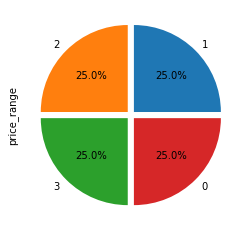

In [5]:
#Get an idea of how the target classes are distributed

df['price_range'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05])

Looks like our target classes are evenly distributed (no bias toward one particular class)

In [6]:
numerical_df = df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time','price_range']]
categorical_df = df.drop(['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time'],axis=1)

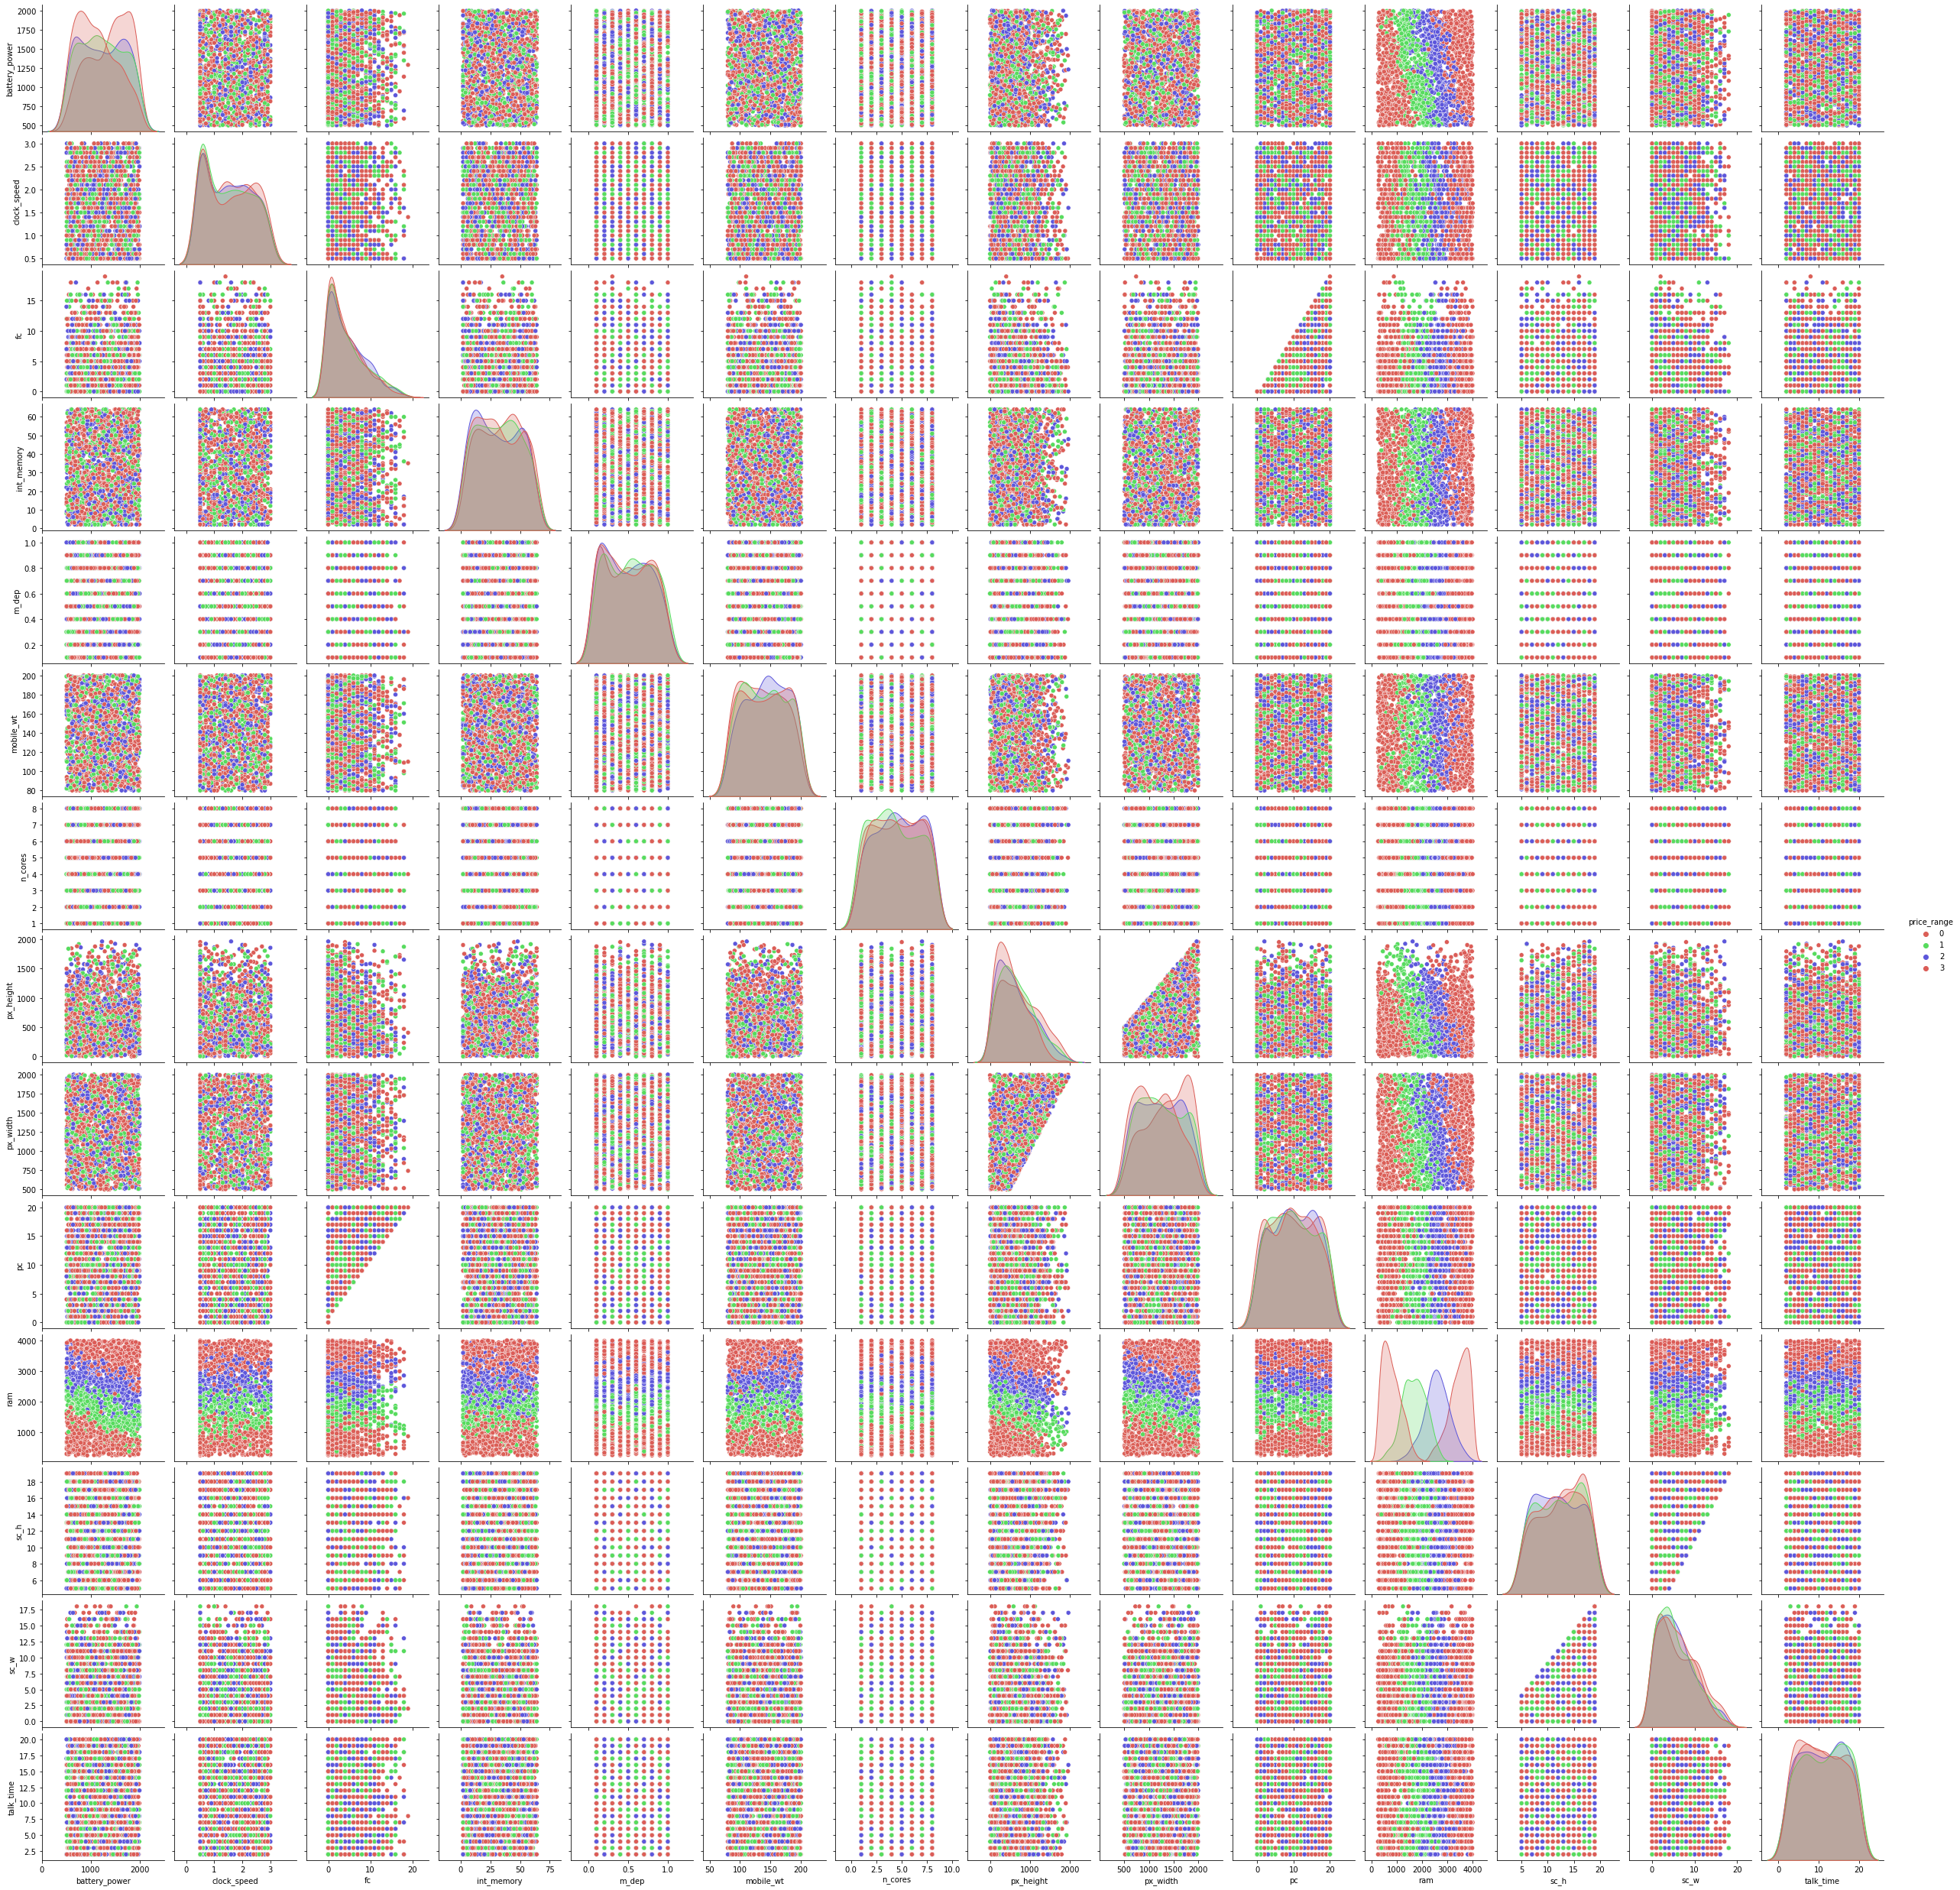

In [23]:
#Pairplot of only numerical columns
sns.pairplot(numerical_df,hue='price_range',palette='hls')

Based on the kde plots on the diagonal (and from the scatterplots), we can see that the data seems pretty well mixed, althought the 'ram' column has some clearly separable categories for our target classes. 'ram' will most likely be the best feature, but we will explore that a little more in the predictive modeling section. For now let's take a closer look at some of these plots.

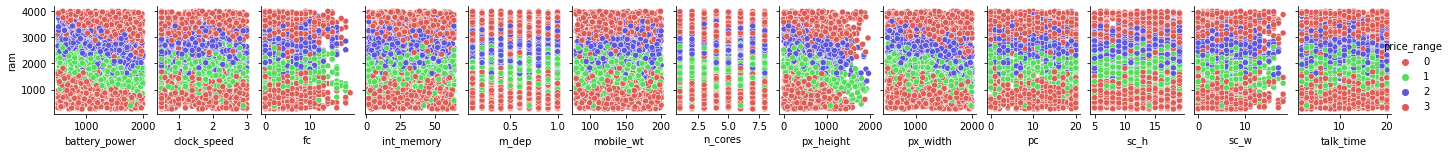

In [51]:
#Plots for ram
sns.pairplot(data=numerical_df,
            y_vars= 'ram',
            x_vars= numerical_df.drop(['ram','price_range'],axis=1).columns,
            hue = 'price_range',
            palette = 'hls')

fig=plt.gcf()
fig.set_size_inches(20,2)
plt.show()

These plots give us a better picture of how clearly defined our target classes are with the amount of ram on the phone. Let's inspect the correlation:

In [7]:
#Correlation between ram and our target classes
numerical_df.corr()['ram']['price_range']

0.9170457362649922

As we can see, the amount of ram is extremely correlated with which price_range the mobile phone will fall into.

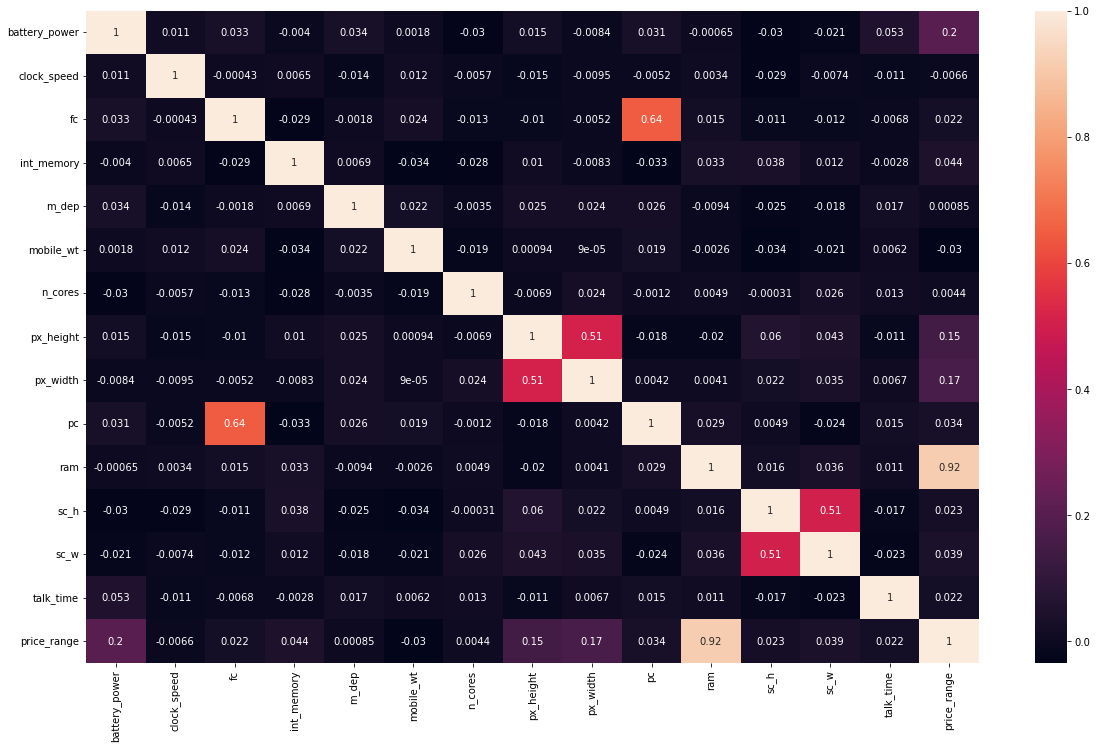

In [60]:
#Check correlation heat map for numerical variables
sns.heatmap(data=numerical_df.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Noteworthy correlations: <br>

* pc and fc = 0.64
* px_height and px_width = 0.51

These two correlations are decently high, but not high enough to be too worried about. The fact that px_height and px_width are correlated makes sense since these variables are dependant on the size of the phone and are proportionally related.

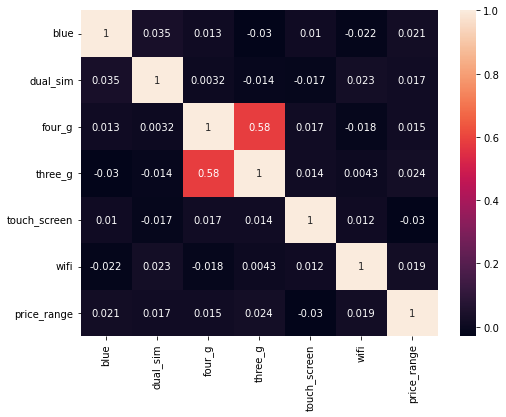

In [104]:
#Check correlation heat map for categorical variables
sns.heatmap(data=categorical_df.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Noteworthy correlations: <br>

* three_g and four_g = 0.58

The correlation between three_g and four_g isn't too shocking since each mobile phone will be one or the other.

In [76]:
#Inspect correlations between price_range and ALL variables
np.absolute(df.corr()['price_range']).sort_values(ascending=False).head(11)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
Name: price_range, dtype: float64

Here we can see the top 10 features correlated with price_range. These features will contribute the most to the predictive power of our models. <br>

It makes sense that battery_power is one of the important features correlated with price. A more expensive phone probably has better battery power! It also makes sense for px_height and px_width to be in the top features since the price of the phone is most likely dependent on its size! <br>

Note: The absolute value of the correlations was taken here to compare magnitude. We should keep in mind that some of these features are negatively correlated with price_range.

<AxesSubplot:xlabel='price_range', ylabel='ram'>

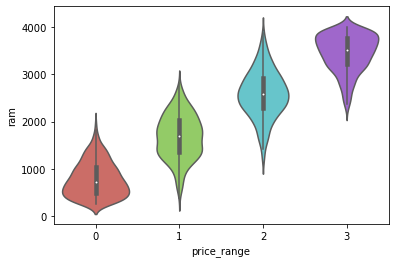

In [106]:
#Inspect distribution of ram for each price_range
sns.violinplot(x="price_range", y="ram", data=df,palette='hls')

In this violinplot, we can see how separated the 'ram' distributions are for the 4 classes. This kind of feature gives our machine learning algorithm a way to clearly separate the classes.

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

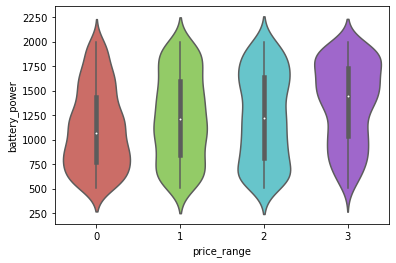

In [98]:
#Inspect distribution of battery_power for each price_range
sns.violinplot(x="price_range", y="battery_power", data=df,palette='hls')

This violinplot shows the next best feature based on our correlation analysis, and you can see that their distributions are located around the same neighborhood. The only thing that distinguishes the classes here are the subtle differences in the distributions. For example, the phones in class 3 tend to have higher battery power than the phones in class 0.

# Predictive Modeling

We begin this section by loading functions we intended to use for our analysis and loading our imports.

### Functional Tools:

In [6]:
#Function for generalizing performance across multiple train/test splits
#Will take some time to run depending on the number of splits

def Avg_Model_Accuracy(X,Y,model,model_name,scaler='standard',nsplits=100,test_size=0.3,kde=False):
    model_acc =[]
    for split in range(nsplits):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=test_size) #Split the data
        
        if scaler == 'standard':
            scaler = StandardScaler()
        elif scaler =='minmax':
            scaler = MinMaxScaler()
            
        scaler.fit(XTRAIN,YTRAIN)
        XTRAIN = scaler.transform(XTRAIN)
        XTEST = scaler.transform(XTEST)
        
        model.fit(XTRAIN,YTRAIN) #Fit the model
        YPRED = model.predict(XTEST)
        model_acc.append(accuracy_score(YTEST,YPRED))
        
    model_mean = round(np.mean(model_acc),3)
    model_2sd=round(2*np.std(model_acc),3)
    print(f'{model_name} Mean Accuracy: {model_mean} +/- {model_2sd}')
    
    if kde == True:
        sns.kdeplot(model_acc) #Optional plot

In [7]:
#Find the best performing number of estimators for a given tree method.
def best_performing_n(X,Y,method,n_iters=50,estimator_range=40):
    n_list = []
    
    if method == 'bag':
        for i in range(n_iters):
            print('Iteratiton: ',i+1, end='\r')
            n_list.append(optimize_n_estimators_bag(X,Y,estimator_range))
        
    elif method == 'boost':
        for i in range(n_iters):
            print('Iteratiton: ',i+1, end='\r')
            n_list.append(optimize_n_estimators_boost(X,Y,estimator_range))
    
    elif method == 'rf':
        for i in range(n_iters):
            print('Iteratiton: ',i+1, end='\r')
            n_list.append(optimize_n_estimators_rf(X,Y,estimator_range))
        
    n, counts = np.unique(n_list,return_counts=True)
    best_idx = list(counts).index(np.max(counts))
    sns.countplot(x=n_list)
    print('\n')
    print('Best N: ',n[best_idx])    
    
    
def optimize_n_estimators_bag(X,Y,estimator_range=40):
    error_rate = 1
    optim_n = 0
    for i in range(1,estimator_range):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        bag = BAG(n_estimators=i)
        bag.fit(XTRAIN,YTRAIN)
        pred_i = bag.predict(XTEST)
        err = np.mean(pred_i != YTEST)
        if err < error_rate:
            error_rate = err
            optim_n = i
    return optim_n

def optimize_n_estimators_boost(X,Y,estimator_range=40):
    error_rate = 1
    optim_n = 0
    for i in range(1,estimator_range):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        boost = GBC(n_estimators=i)
        boost.fit(XTRAIN,YTRAIN)
        pred_i = boost.predict(XTEST)
        err = np.mean(pred_i != YTEST)
        if err < error_rate:
            error_rate = err
            optim_n = i
    return optim_n


def optimize_n_estimators_rf(X,Y,estimator_range=40):
    error_rate = 1
    optim_n = 0
    for i in range(1,estimator_range):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        rf = RF(n_estimators=i)
        rf.fit(XTRAIN,YTRAIN)
        pred_i = rf.predict(XTEST)
        err = np.mean(pred_i != YTEST)
        if err < error_rate:
            error_rate = err
            optim_n = i
    return optim_n

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import BaggingClassifier as BAG
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV

In [10]:
X = np.array(df.drop('price_range',axis=1))
Y = np.array(df['price_range'])
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y)

### Basic Desicion Tree

In [11]:
model = DT(max_depth=None)
model.fit(XTRAIN,YTRAIN)
predictions = model.predict(XTEST)
print(classification_report(YTEST,predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       108
           1       0.78      0.77      0.77       128
           2       0.74      0.80      0.77       135
           3       0.91      0.82      0.86       129

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [12]:
print(confusion_matrix(YTEST,predictions))

[[ 96  12   0   0]
 [ 15  98  15   0]
 [  0  16 108  11]
 [  0   0  23 106]]


Decision Tree Mean Accuracy: 0.827 +/- 0.031


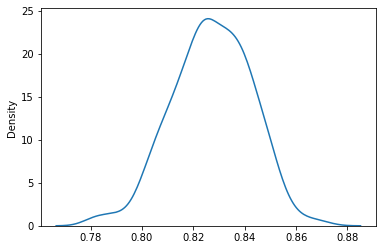

In [13]:
Avg_Model_Accuracy(X,Y,DT(max_depth=None),'Decision Tree',nsplits=500,kde=True)

We can see that a basic decision tree performs well with the given data. We were able to obtain around 80% accuracy off this train/test split! Because this basic tree is performing so well, we don't expect the tree ensembles to dramatically improve the results, but let's see how much extra accuracy we can squeeze out of our models.

### Bagging

In [15]:
bagmodel = BAG(n_estimators=5)
bagmodel.fit(XTRAIN,YTRAIN)
bagpredictions = bagmodel.predict(XTEST)
print(classification_report(YTEST,bagpredictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       112
           1       0.78      0.84      0.81       117
           2       0.81      0.79      0.80       131
           3       0.94      0.90      0.92       140

    accuracy                           0.86       500
   macro avg       0.86      0.87      0.86       500
weighted avg       0.87      0.86      0.86       500



In [16]:
print(confusion_matrix(YTEST,bagpredictions))

[[104   8   0   0]
 [  8  98  11   0]
 [  0  19 104   8]
 [  0   0  14 126]]


Our bagging model only slightly improved accuracy. This may be because we used the default paramter for n_estimators. Let's see if we can optimize n_estimators using our function and a grid search.

Iteratiton:  50

Best N:  13


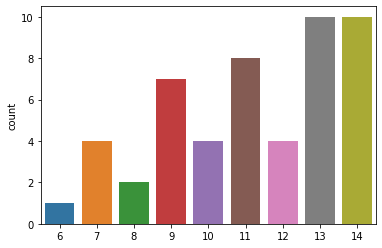

In [18]:
#This is an example of our optimizing function to give an idea of what information the output provides
best_performing_n(X,Y,'bag',n_iters=50,estimator_range=15)

This function will iterate through a range of n_estimators and then choose the best performing value. It will tally the number of selected best performers over a given iteration interval. For best results, it is recommended to run for at least 500 iterations, however it does take a very long time to run. If the number of iterations is low, you will have many candidates that have similar number of best performances (almost uniformly distributed). After many iterations, it will become clear based on the distribution of best performers which candidates are best suited for our data.

In [17]:
#RESULTS WERE OBTAINED FROM RUNNING THIS CODE
#TAKES A LONG TIME TO RUN

#best_performing_n(X,Y,'bag',n_iters=500,estimator_range=60)

#Candidates: 36, 39, 19

In [22]:
#Create our parameter grid
param_grid = {'n_estimators': [36,39,19]} 

grid = GridSearchCV(BAG(),param_grid,refit=True,verbose=0)

In [24]:
grid.fit(XTRAIN,YTRAIN)
grid.best_params_

{'n_estimators': 39}

In [25]:
bagmodel = BAG(n_estimators=39)
bagmodel.fit(XTRAIN,YTRAIN)
bagpredictions = bagmodel.predict(XTEST)
print(classification_report(YTEST,bagpredictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       112
           1       0.79      0.88      0.83       117
           2       0.84      0.79      0.82       131
           3       0.93      0.90      0.92       140

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



Seems like the combination of our optimizing function and the gridsearch helped us improve the accuracy of our bagging model! Let's take a look at it's general performance.

bag Mean Accuracy: 0.886 +/- 0.026


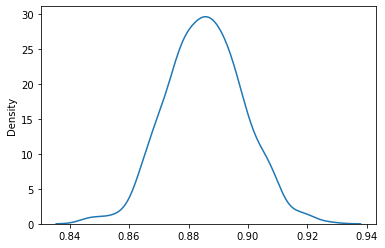

In [26]:
Avg_Model_Accuracy(X,Y,BAG(n_estimators=39),'bag',nsplits=500,kde=True)

### Boosting

In [27]:
boostmodel = GBC(n_estimators=5)
boostmodel.fit(XTRAIN,YTRAIN)
boostpredictions = boostmodel.predict(XTEST)
print(classification_report(YTEST,boostpredictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       112
           1       0.61      0.81      0.69       117
           2       0.72      0.57      0.64       131
           3       0.94      0.86      0.90       140

    accuracy                           0.78       500
   macro avg       0.79      0.78      0.78       500
weighted avg       0.79      0.78      0.78       500



In [28]:
print(confusion_matrix(YTEST,boostpredictions))

[[ 99  13   0   0]
 [ 11  95  11   0]
 [  0  48  75   8]
 [  0   1  18 121]]


In [29]:
#RESULTS WERE OBTAINED FROM RUNNING THIS CODE
#TAKES A LONG TIME TO RUN

#best_performing_n(X,Y,'boost',n_iters=500,estimator_range=60)

#Candidates: 39, 38, 37, 36, 35

In [30]:
#Create our parameter grid
param_grid = {'n_estimators': [35,36,37,38,39]} 

grid = GridSearchCV(GBC(),param_grid,refit=True,verbose=0)

In [31]:
grid.fit(XTRAIN,YTRAIN)
grid.best_params_

{'n_estimators': 38}

In [32]:
boostmodel = GBC(n_estimators=38)
boostmodel.fit(XTRAIN,YTRAIN)
boostpredictions = boostmodel.predict(XTEST)
print(classification_report(YTEST,boostpredictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       112
           1       0.74      0.84      0.78       117
           2       0.81      0.78      0.79       131
           3       0.98      0.89      0.93       140

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [33]:
print(confusion_matrix(YTEST,boostpredictions))

[[103   9   0   0]
 [ 10  98   9   0]
 [  0  26 102   3]
 [  0   0  15 125]]


boost Mean Accuracy: 0.873 +/- 0.027


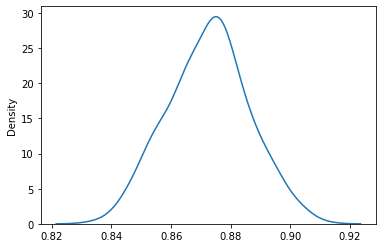

In [34]:
Avg_Model_Accuracy(X,Y,GBC(n_estimators=38),'boost',nsplits=500,kde=True)

### Random Forest

In [35]:
rfmodel = RF(n_estimators=5)
rfmodel.fit(XTRAIN,YTRAIN)
rfpredictions = rfmodel.predict(XTEST)
print(classification_report(YTEST,rfpredictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       112
           1       0.63      0.73      0.68       117
           2       0.59      0.60      0.60       131
           3       0.86      0.69      0.76       140

    accuracy                           0.73       500
   macro avg       0.74      0.74      0.73       500
weighted avg       0.74      0.73      0.73       500



In [36]:
print(confusion_matrix(YTEST,rfpredictions))

[[104   8   0   0]
 [ 16  85  16   0]
 [  1  35  79  16]
 [  0   6  38  96]]


In [37]:
#RESULTS WERE OBTAINED FROM RUNNING THIS CODE
#TAKES A LONG TIME TO RUN

#best_performing_n(X,Y,'rf',n_iters=500,estimator_range=60)

#Candidates: 38, 39, 33, 37 , 32

In [39]:
#Create our parameter grid
param_grid = {'n_estimators': [38,39,33,37,32]} 

grid = GridSearchCV(RF(),param_grid,refit=True,verbose=0)

In [40]:
grid.fit(XTRAIN,YTRAIN)
grid.best_params_

{'n_estimators': 38}

In [41]:
rfmodel = RF(n_estimators=38)
rfmodel.fit(XTRAIN,YTRAIN)
rfpredictions = rfmodel.predict(XTEST)
print(classification_report(YTEST,rfpredictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       112
           1       0.72      0.83      0.77       117
           2       0.81      0.69      0.75       131
           3       0.91      0.92      0.92       140

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [42]:
print(confusion_matrix(YTEST,rfpredictions))

[[103   9   0   0]
 [ 10  97  10   0]
 [  0  28  91  12]
 [  0   0  11 129]]


rf Mean Accuracy: 0.857 +/- 0.027


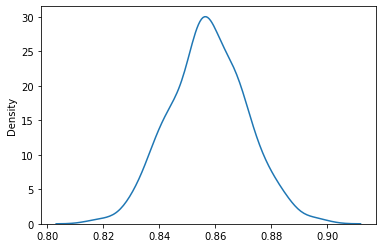

In [43]:
Avg_Model_Accuracy(X,Y,RF(n_estimators=38),'rf',nsplits=500,kde=True)

# Selecting Our Final Model

So far we've experimented with 4 different model types (Decision Tree, Bagging, Boosting, Random Forest). We were able to play around with some hyperparameter optimization and gauge the general performance of all the models. Let's look at a quick comparison between the models:

In [26]:
# Building a df to show our results

results = {'Models':['Decision Tree','Bagging','Boosting','Random Forest'],
          'Mean Accuracy':[0.827,0.886,0.873,0.857],
          '2std':[0.031,0.026,0.027,0.027]}

results_df = pd.DataFrame.from_dict(results)

highlight = lambda x: ['background: papayawhip' if x.name in [1] else '' for i in x]

In [27]:
results_df.style.apply(highlight,axis=1)

Comparing the 4 models, we can see that the bagging model was the best performing. We will choose this model to be our final model. Now that we have selected a model, let's do one last grid search to fine tune our parameters and then we'll be able to train our model on the entire train set and make predictions onto the true test set (which we haven't seen yet). The final predictions on this test set will give us a general idea of how well our model will perform for classifying mobile phones by price range!

In [32]:
param_grid = {'n_estimators': list(range(1,200))} 

grid = GridSearchCV(BAG(),param_grid,refit=True,verbose=0)

In [33]:
grid.fit(XTRAIN,YTRAIN)
grid.best_params_

{'n_estimators': 45}

In [34]:
bagmodel = BAG(n_estimators=45)

scaler = StandardScaler() #Scaling the data before fitting
scaler.fit(XTRAIN,YTRAIN)
XTRAIN = scaler.transform(XTRAIN)
XTEST = scaler.transform(XTEST)

bagmodel.fit(XTRAIN,YTRAIN)
bagpredictions = bagmodel.predict(XTEST)
print(classification_report(YTEST,bagpredictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.82      0.86      0.84       128
           2       0.84      0.83      0.83       135
           3       0.92      0.90      0.91       129

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [35]:
Avg_Model_Accuracy(X,Y,BAG(n_estimators=45),'bag',nsplits=250)

bag Mean Accuracy: 0.887 +/- 0.025


We've done all we can up to this point! Let's train our data on the entire train set and then make our final predictions.

In [36]:
df_train = pd.read_csv('mobiletrain.csv')
df_test = pd.read_csv('mobiletest.csv')

In [45]:
X_train = np.array(df_train.drop('price_range',axis=1))
y_train = np.array(df_train['price_range'])

X_test = np.array(df_test.drop('id',axis=1))

In [46]:
bagmodel = BAG(n_estimators=45)

scaler = StandardScaler() #Scaling the data before fitting
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

bagmodel.fit(X_train,y_train)
bagpredictions = bagmodel.predict(X_test)

<AxesSubplot:ylabel='Predictions'>

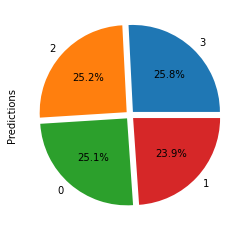

In [56]:
preds = pd.DataFrame(bagpredictions,columns=['Predictions'])
preds['Predictions'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05])

Above is the distribution of our final predictions. It seems that the test data set contained a pretty even mix of price ranges based on our model predictions. <br>

Note: The actual test price_range labels were not given in this dataset (we cannot measure accuracy in this case).

# Conclusion

After spending some time exploring the data and experimenting with different tree models, we were able to determine which model was best suited for our dataset and which features were more important when it came to predicting a phone's price range.

### Final Model: Bagging Classifier with 45 Estimators

As we wrap up this notebook, let's just take a quick look at how each feature performs on its own when it comes to predicting price range

In [62]:
#Indivual classifications for each feature to compare affect on accuracy.

#For Xdata we pass in a feature dataframe

def feature_accuracy(Xdata,Y,model,test_size=0.3,top_features=5):
    feat_accs = {}
    
    for i in range(len(Xdata.columns)):
        X = np.array(Xdata[Xdata.columns[i]]).reshape(-1,1)
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=test_size,random_state=420,shuffle=True)
        
        scaler = MinMaxScaler() #Scale the data for SVC
        scaler.fit(XTRAIN)
        XTRAIN = scaler.transform(XTRAIN)
        XTEST = scaler.transform(XTEST)
        
        model.fit(XTRAIN,YTRAIN) #Fit the model
        YPRED = model.predict(XTEST)
        
        accuracy = np.round(accuracy_score(YTEST,YPRED),3)
        feature_name=Xdata.columns[i]
        
        feat_accs[str(feature_name)] = accuracy
    #Returns a dictionary of features and their accuracies
    
    acc_df = pd.DataFrame(columns=['Feature','Accuracy']) #Create empty dataframe for top features/accuracies
    for j in range(top_features):
        max_value = max(feat_accs.values()) #Highest accuracy in dictionary
        max_key= max(feat_accs, key=feat_accs.get) #Feature name with highest accuracy
        
        acc_df.loc[len(acc_df)] = [max_key,max_value] #Insert new row into our dataframe
    
        feat_accs.pop(max_key) #Remove the feature we just added so it does not get selected again
        
    return acc_df #Dataframe of top features

In [63]:
accuracy_df = feature_accuracy(df.drop('price_range',axis=1),Y,BAG(n_estimators=45),top_features=10)

In [65]:
#Top 10 features based on individual accuracy contribution
accuracy_df

Feature  Accuracy
0            ram     0.665
1      px_height     0.270
2    clock_speed     0.267
3      mobile_wt     0.267
4  battery_power     0.262
5           blue     0.257
6             pc     0.255
7          m_dep     0.253
8           sc_h     0.252
9             fc     0.250

Based on the results of our notebook, we have found that the amount of ram on the phone is the top contributing factor to predicting its price range. Other noteworthy features are px_height, clock_speed, and mobile_wt. Notice that most of the other features hover around 25% accruacy which is the equivalent of guessing randomly, so we can conclude that those features don't have as much of an impact on a phone's price range!